In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
data = pd.read_csv('player_stats_with_advanced.csv')

# NBA Dataset Column Descriptions

- **Player**: Name of the player.
- **Age**: Age of the player during the season.
- **Team (Tm)**: Abbreviation of the team the player played for.
- **Pos**: Player's position (e.g., PG, SG, SF, PF, C).
- **Year**: The season or year the data corresponds to.
- **Awards**: Any awards won by the player during the season (e.g., MVP, All-Star, etc.).

## Basic Statistics
- **G**: Games played.
- **GS**: Games started.
- **MP**: Minutes played.

## Shooting Statistics
- **FG**: Field goals made.
- **FGA**: Field goals attempted.
- **FG%**: Field goal percentage (FG / FGA).
- **3P**: Three-pointers made.
- **3PA**: Three-pointers attempted.
- **3P%**: Three-point percentage (3P / 3PA).
- **2P**: Two-point field goals made.
- **2PA**: Two-point field goals attempted.
- **2P%**: Two-point field goal percentage (2P / 2PA).
- **eFG%**: Effective field goal percentage, which adjusts for the increased value of three-pointers.

## Free Throw Statistics
- **FT**: Free throws made.
- **FTA**: Free throws attempted.
- **FT%**: Free throw percentage (FT / FTA).

## Rebounding Statistics
- **ORB**: Offensive rebounds.
- **DRB**: Defensive rebounds.
- **TRB**: Total rebounds (ORB + DRB).

## Assist and Turnover Statistics
- **AST**: Assists.
- **STL**: Steals.
- **BLK**: Blocks.
- **TOV**: Turnovers.
- **PF**: Personal fouls.
- **PTS**: Total points scored.

## Advanced Metrics
- **PER**: Player Efficiency Rating, a measure of per-minute production standardized to a league average of 15.
- **TS%**: True Shooting Percentage, which considers field goals, three-point field goals, and free throws.
- **3PAr**: Three-Point Attempt Rate, the percentage of field goal attempts taken as three-pointers.
- **FTr**: Free Throw Rate, the number of free throw attempts per field goal attempt.
- **ORB%**: Offensive Rebound Percentage, an estimate of the percentage of available offensive rebounds a player grabbed while on the floor.
- **DRB%**: Defensive Rebound Percentage, an estimate of the percentage of available defensive rebounds a player grabbed while on the floor.
- **TRB%**: Total Rebound Percentage, an estimate of the percentage of available rebounds a player grabbed while on the floor.
- **AST%**: Assist Percentage, an estimate of the percentage of teammate field goals a player assisted while on the floor.
- **STL%**: Steal Percentage, an estimate of the percentage of opponent possessions that end in a steal by the player while on the floor.
- **BLK%**: Block Percentage, an estimate of the percentage of opponent two-point field goal attempts blocked by the player.
- **TOV%**: Turnover Percentage, turnovers per 100 plays.
- **USG%**: Usage Percentage, an estimate of the percentage of team plays used by a player while on the floor.

## Win Shares and Value Metrics
- **WS**: Win Shares, an estimate of the number of wins contributed by a player.
- **WS/48**: Win shares per 48 minutes, normalizing win shares to per-minute contributions.
- **OWS**: Offensive Win Shares, win shares contributed through offense.
- **DWS**: Defensive Win Shares, win shares contributed through defense.
- **OBPM**: Offensive Box Plus-Minus, a box score estimate of the offensive points per 100 possessions a player contributed above a league-average player.
- **DBPM**: Defensive Box Plus-Minus, a box score estimate of the defensive points per 100 possessions a player contributed above a league-average player.
- **BPM**: Box Plus-Minus, a box score estimate of the overall points per 100 possessions a player contributed above a league-average player.
- **VORP**: Value Over Replacement Player, a box score estimate of a player's overall contribution compared to a replacement-level player.

## Other Columns
- **' '**: Placeholder column, possibly for separating sections in the dataset or containing missing data.
- **' .1'**: Placeholder column, possibly for separating sections in the dataset or containing missing data.
- **' .2'**: Placeholder column, possibly for separating sections in the dataset or containing missing data.
- **' .3'**: Placeholder column, possibly for separating sections in the dataset or containing missing data.


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  5735 non-null   object 
 1   Age     5735 non-null   int64  
 2   Team    5735 non-null   object 
 3   Pos     5735 non-null   object 
 4   G       5735 non-null   int64  
 5   GS      5735 non-null   int64  
 6   MP      5735 non-null   float64
 7   FG      5735 non-null   float64
 8   FGA     5735 non-null   float64
 9   FG%     5704 non-null   float64
 10  3P      5735 non-null   float64
 11  3PA     5735 non-null   float64
 12  3P%     5299 non-null   float64
 13  2P      5735 non-null   float64
 14  2PA     5735 non-null   float64
 15  2P%     5666 non-null   float64
 16  eFG%    5704 non-null   float64
 17  FT      5735 non-null   float64
 18  FTA     5735 non-null   float64
 19  FT%     5441 non-null   float64
 20  ORB     5735 non-null   float64
 21  DRB     5735 non-null   float64
 22  

In [195]:
list = []

for i in range(5):
    list.append(data.columns[[29, 43, 44, 49, 50]][i])


In [196]:
data = data.drop(columns = list)

In [197]:
features = data[['Age', 'G', 'GS', 'MP', 'FG%', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 
      'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 
      'TOV%', 'USG%', 'WS/48', 'OWS', 'DWS', 'OBPM', 'DBPM', 'BPM', 'VORP']]

In [198]:
(features.corr() > 0.9).sum().sort_values(ascending = False)

2PA      5
FG       5
PTS      4
FGA      4
2P       3
eFG%     3
OBPM     2
TS%      2
FT       2
FTA      2
3PA      2
3P       2
FG%      2
BPM      2
TOV%     1
AST%     1
STL%     1
BLK%     1
Age      1
USG%     1
WS/48    1
OWS      1
DWS      1
DRB%     1
DBPM     1
TRB%     1
PF       1
ORB%     1
FTr      1
3PAr     1
PER      1
G        1
TOV      1
BLK      1
STL      1
AST      1
DRB      1
ORB      1
MP       1
GS       1
VORP     1
dtype: int64

<Axes: >

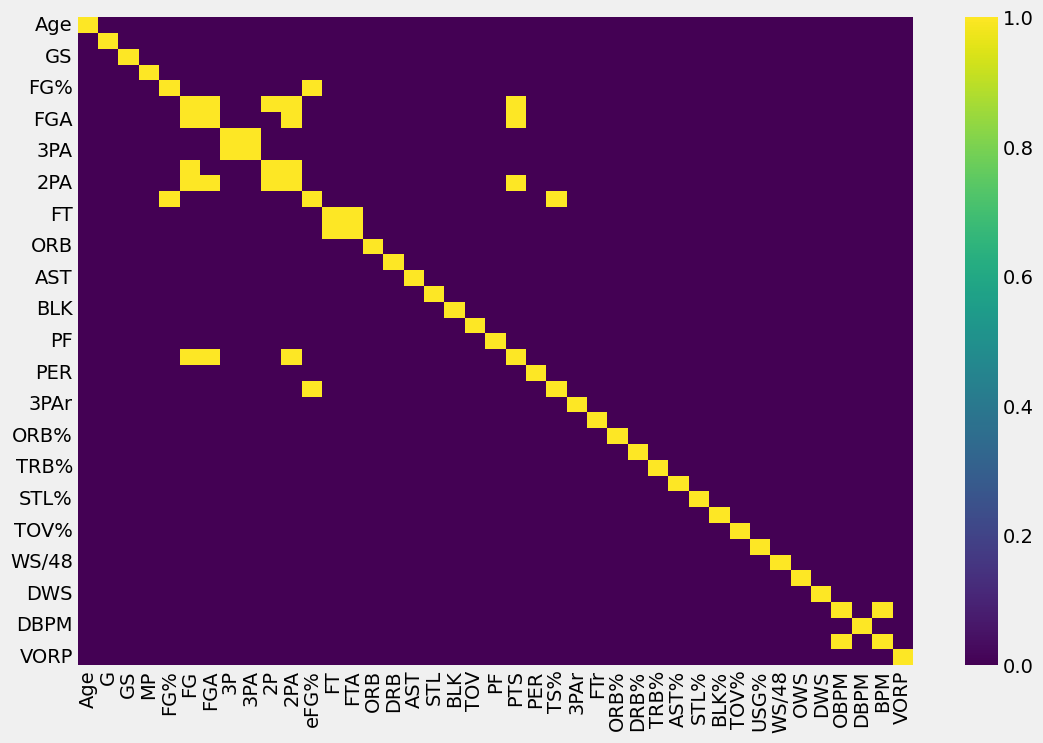

In [199]:
plt.figure(figsize=(12,8))
sns.heatmap(features.corr() > 0.9, cmap='viridis')

In [200]:
features = features.drop(columns=['2PA', 'FG', 'PTS', 'FGA', 'eFG%', 'BPM', '3PA', 'FT', 'MP'])

In [201]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
features_reduced = pd.DataFrame(selector.fit_transform(features))
retained_columns = features.columns[selector.get_support()]

In [202]:
features_reduced.columns = retained_columns

In [203]:
features_reduced = features_reduced.dropna()

In [204]:
features_reduced = features_reduced[features_reduced['G'] > 40]

In [205]:
features_reduced

,Age,G,GS,3P,2P,FTA,ORB,DRB,AST,STL,...,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,OBPM,DBPM,VORP
0,25.0,81.0,81.0,2.4,8.1,9.9,0.7,6.7,5.5,1.3,...,26.7,1.7,1.5,12.2,33.0,14.8,4.4,8.8,1.4,9.6
1,29.0,77.0,77.0,2.2,7.5,7.0,1.9,6.2,3.1,1.2,...,15.8,1.7,1.5,9.5,32.4,8.1,2.5,5.8,-0.8,5.3
2,29.0,77.0,77.0,1.5,8.5,7.6,1.1,5.9,6.3,1.6,...,32.0,2.2,0.8,14.4,31.0,12.3,3.7,7.8,1.1,7.9
3,25.0,77.0,77.0,2.5,6.0,8.2,2.9,9.6,4.4,0.8,...,21.4,1.0,1.0,10.3,28.8,10.6,3.7,8.3,0.6,7.7
4,24.0,73.0,73.0,2.4,5.1,9.1,0.8,3.9,6.1,1.6,...,27.3,2.1,0.8,15.0,27.8,10.1,2.7,5.4,0.2,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,22.0,57.0,8.0,0.3,0.6,0.2,0.8,1.2,0.9,0.3,...,10.8,1.3,0.9,21.1,10.0,0.5,0.5,-3.6,0.0,-0.2
5659,24.0,44.0,0.0,0.3,0.5,0.0,0.5,1.0,0.6,0.3,...,8.1,1.5,1.4,9.0,11.1,0.1,0.3,-4.0,0.2,-0.2
5666,25.0,45.0,11.0,0.0,0.8,0.5,1.2,2.0,0.6,0.2,...,5.4,0.7,3.0,19.6,6.0,0.9,0.7,-2.4,0.7,0.0
5671,31.0,43.0,0.0,0.0,0.6,0.9,1.1,1.5,0.9,0.2,...,15.2,1.4,1.5,16.9,12.9,0.4,0.4,-2.9,0.3,0.0


In [206]:
len(features_reduced)

3679

In [207]:
for col in features_reduced.columns:
    if (features_reduced[col] < 0).any() == True:
        print(col)

OWS
DWS
OBPM
DBPM
VORP


In [208]:
features_reduced= features_reduced.drop(features_reduced[features_reduced['DWS'] < 0].index.to_list())

In [209]:
len(features_reduced)

3675

In [210]:
import seaborn as sns

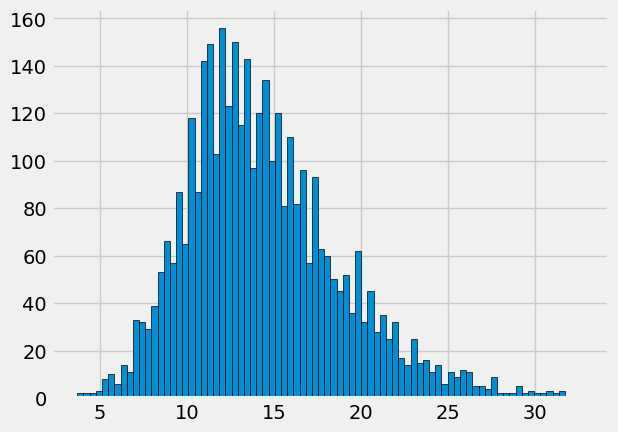

In [211]:
plt.style.use('fivethirtyeight')
plt.hist(features_reduced['PER'], bins = 82, edgecolor = 'black')
plt.show()

In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
scale = StandardScaler()

In [214]:
features_scaled = scale.fit_transform(features_reduced)

In [215]:
df_features_scaled = pd.DataFrame(features_scaled)

In [216]:
df_features_scaled.columns = features_reduced.columns
df_features_scaled.columns

Index(['Age', 'G', 'GS', '3P', '2P', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PER', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'OBPM', 'DBPM', 'VORP'],
      dtype='object')

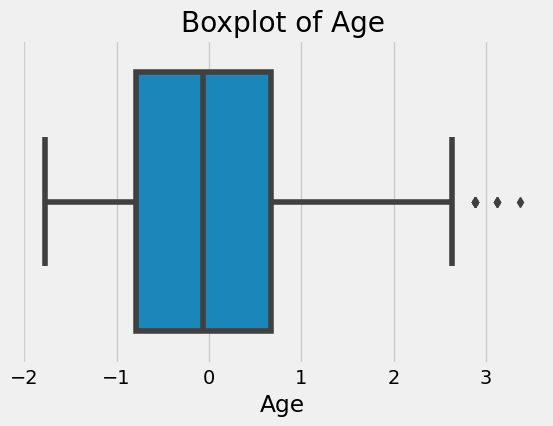

<Figure size 640x480 with 0 Axes>

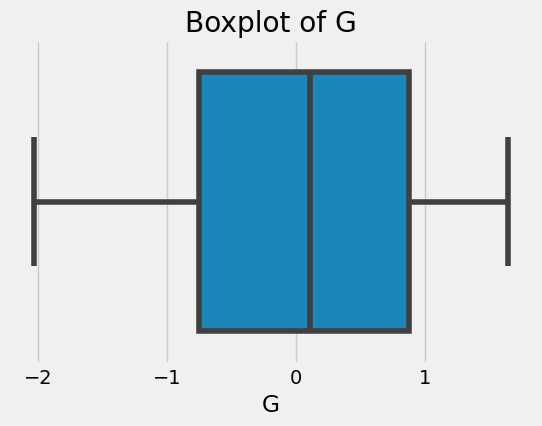

<Figure size 640x480 with 0 Axes>

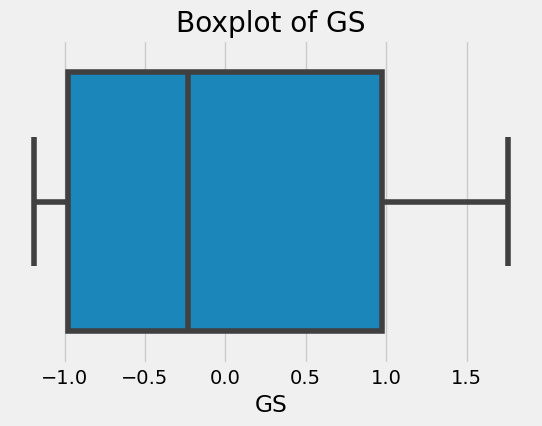

<Figure size 640x480 with 0 Axes>

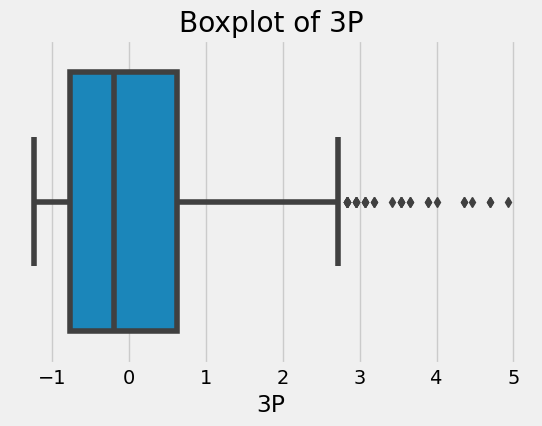

<Figure size 640x480 with 0 Axes>

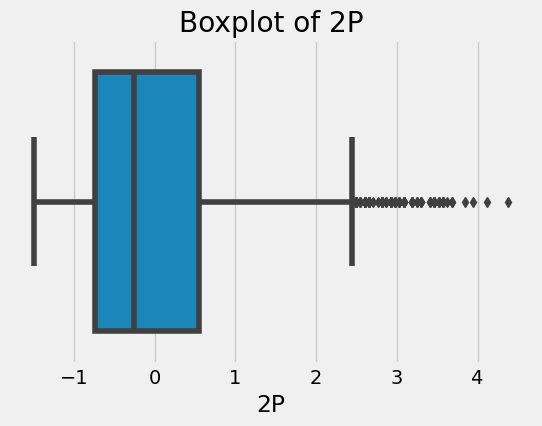

<Figure size 640x480 with 0 Axes>

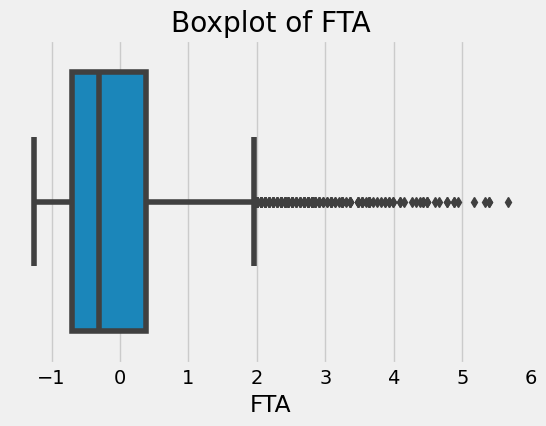

<Figure size 640x480 with 0 Axes>

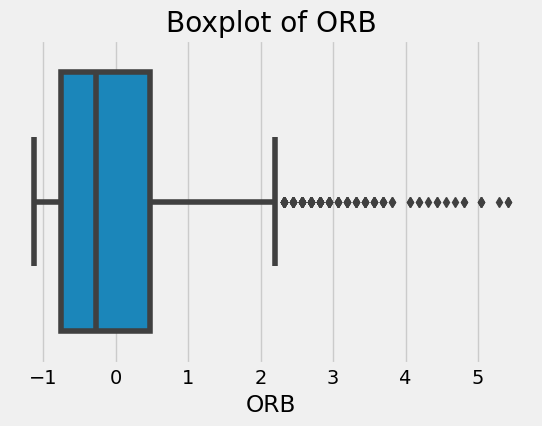

<Figure size 640x480 with 0 Axes>

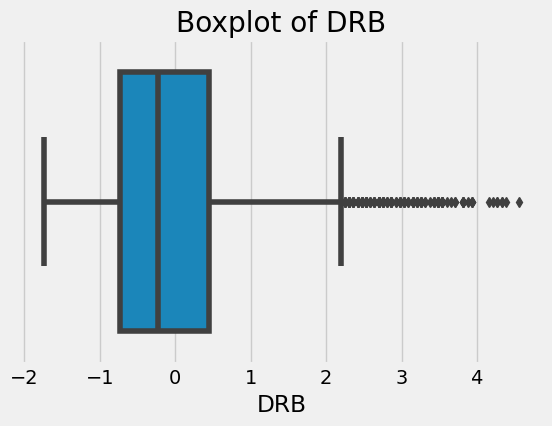

<Figure size 640x480 with 0 Axes>

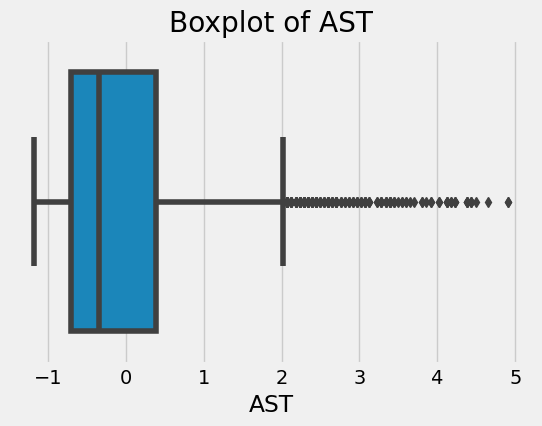

<Figure size 640x480 with 0 Axes>

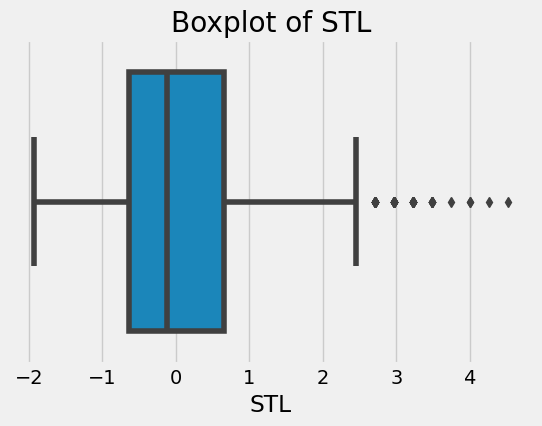

<Figure size 640x480 with 0 Axes>

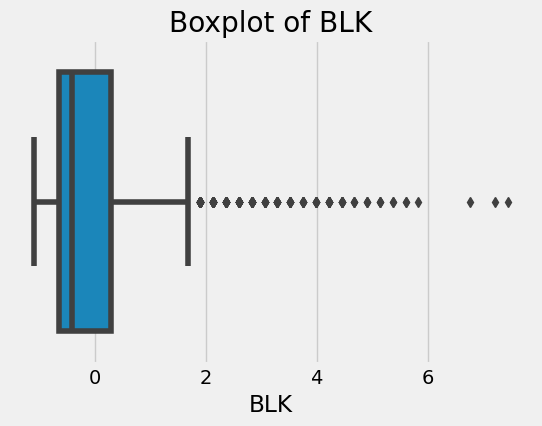

<Figure size 640x480 with 0 Axes>

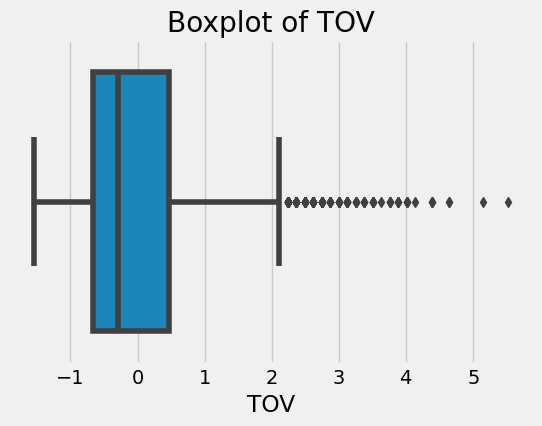

<Figure size 640x480 with 0 Axes>

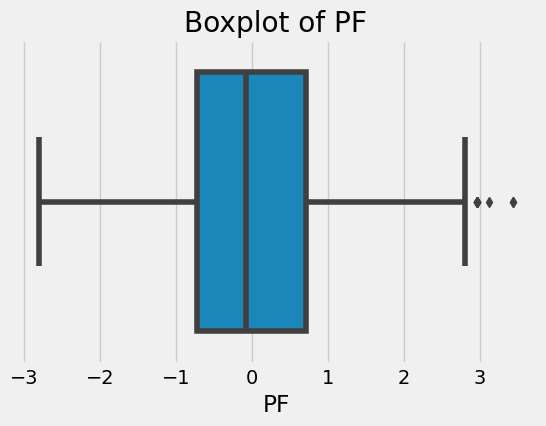

<Figure size 640x480 with 0 Axes>

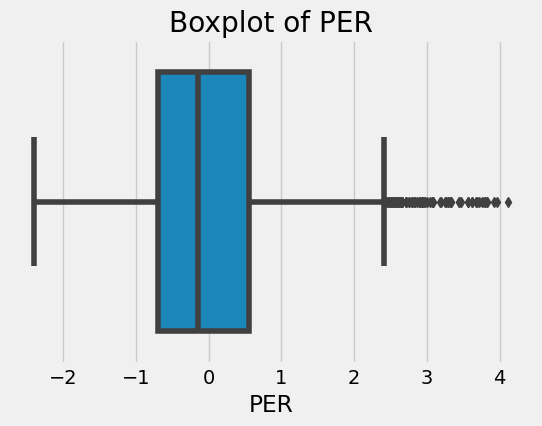

<Figure size 640x480 with 0 Axes>

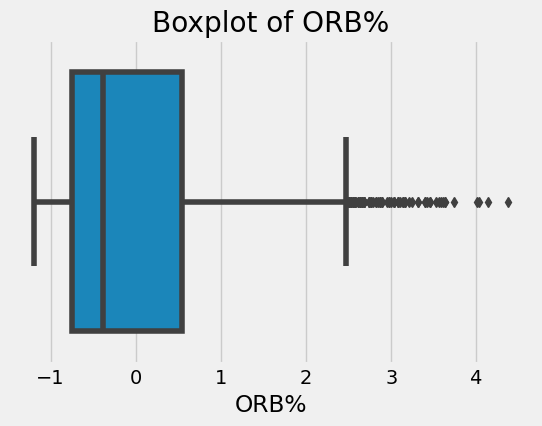

<Figure size 640x480 with 0 Axes>

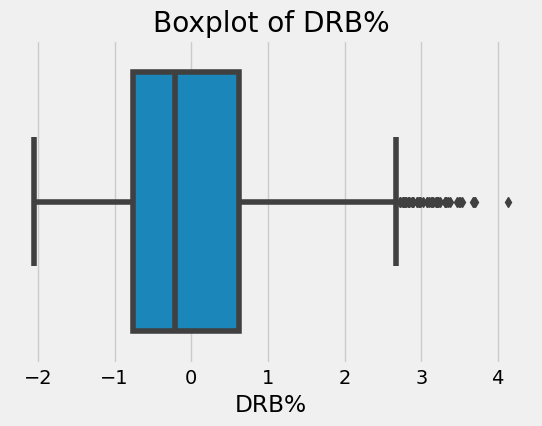

<Figure size 640x480 with 0 Axes>

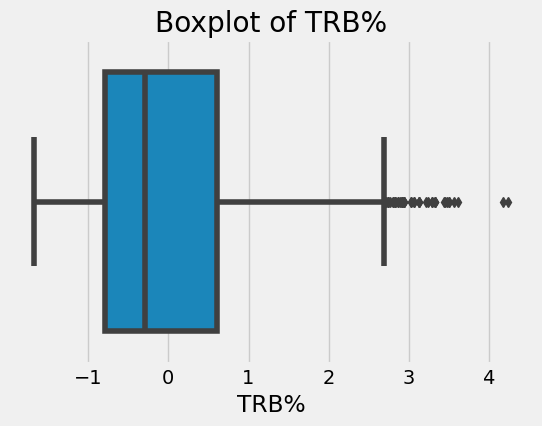

<Figure size 640x480 with 0 Axes>

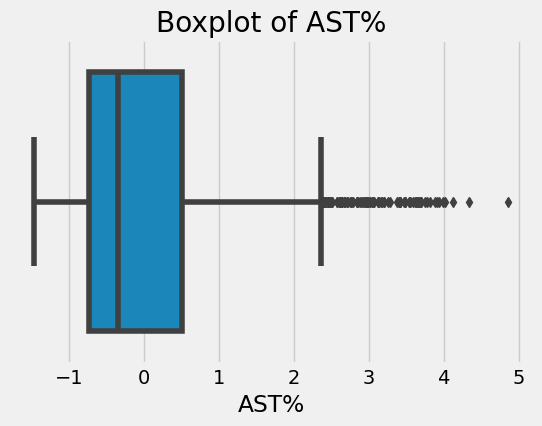

<Figure size 640x480 with 0 Axes>

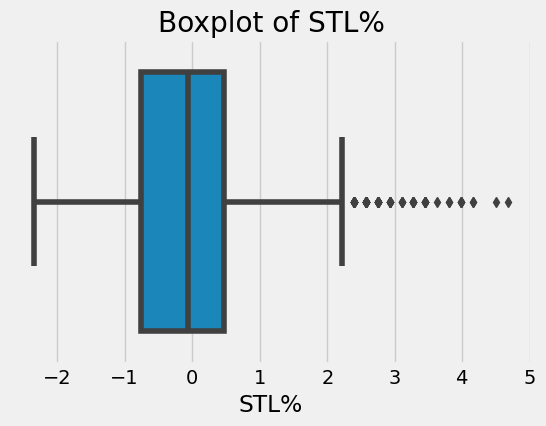

<Figure size 640x480 with 0 Axes>

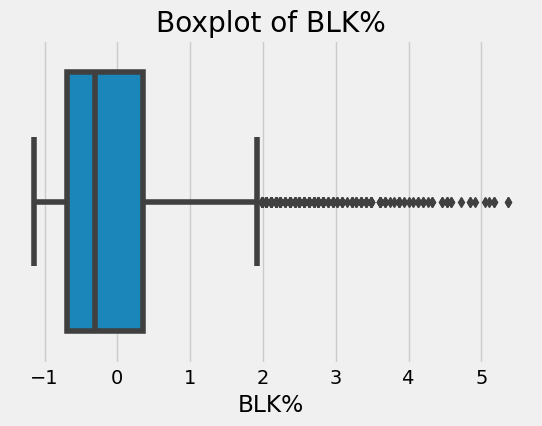

<Figure size 640x480 with 0 Axes>

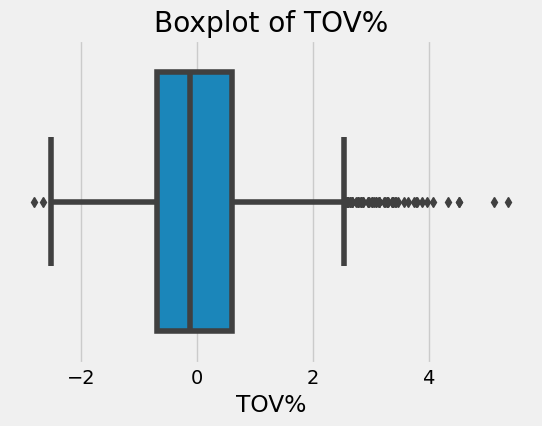

<Figure size 640x480 with 0 Axes>

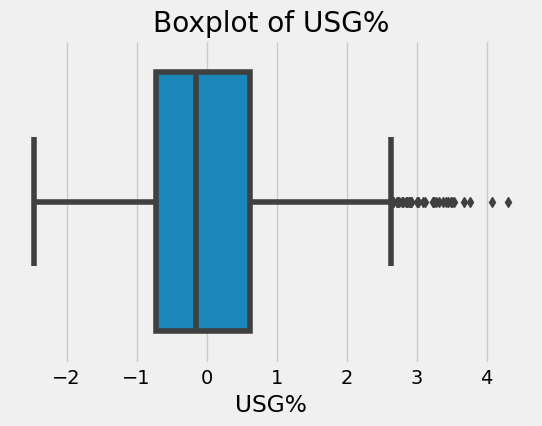

<Figure size 640x480 with 0 Axes>

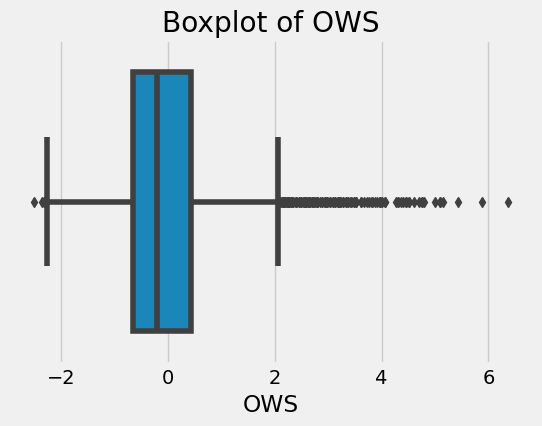

<Figure size 640x480 with 0 Axes>

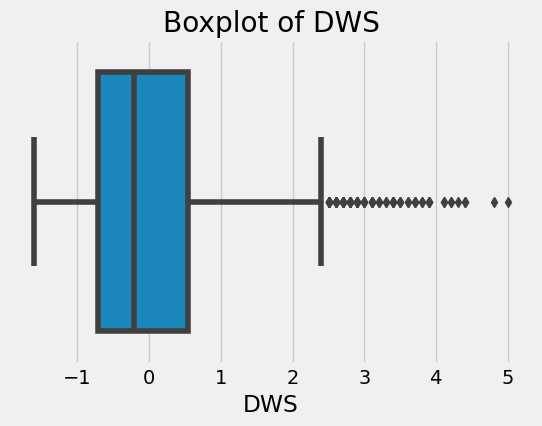

<Figure size 640x480 with 0 Axes>

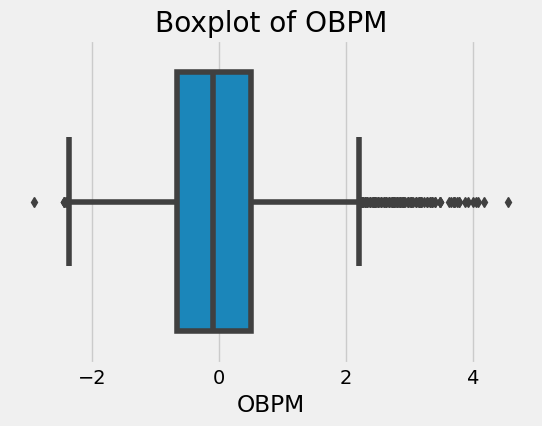

<Figure size 640x480 with 0 Axes>

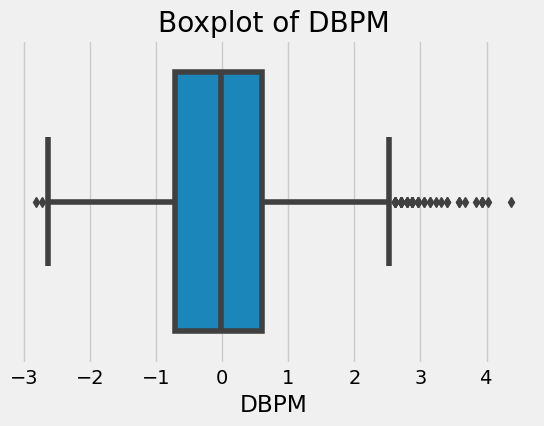

<Figure size 640x480 with 0 Axes>

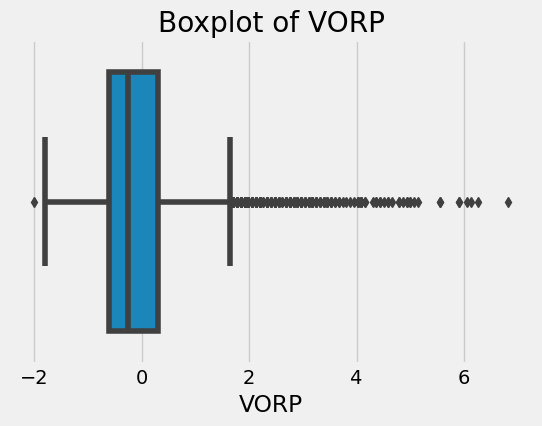

<Figure size 640x480 with 0 Axes>

In [217]:
for col in df_features_scaled.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data = df_features_scaled, x = col)
    plt.title("Boxplot of " + col)
    plt.show()
    plt.clf()

In [218]:
df_features_scaled

,Age,G,GS,3P,2P,FTA,ORB,DRB,AST,STL,...,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,OBPM,DBPM,VORP
0,-0.304518,1.388021,1.688595,1.555021,2.815359,4.319543,-0.388103,1.910944,1.653700,1.423199,...,1.417566,0.287494,-0.172056,-0.058997,2.649571,6.373446,2.800943,3.913191,1.212695,6.118846
1,0.674362,1.045644,1.546364,1.322038,2.491844,2.684927,1.094000,1.630172,0.392741,1.164825,...,0.192621,0.287494,-0.172056,-0.802270,2.535839,3.082512,0.897232,2.633243,-0.715492,3.106911
2,0.674362,1.045644,1.546364,0.506601,3.031036,3.023123,0.105932,1.461709,2.074020,2.198319,...,2.013181,1.165603,-0.628313,0.546632,2.270466,5.145486,2.099576,3.486541,0.949760,4.928081
3,-0.304518,1.045644,1.546364,1.671512,1.683056,3.361320,2.329086,3.539420,1.075761,0.131331,...,0.821951,-0.941859,-0.497954,-0.582041,1.853451,4.310473,2.099576,3.699866,0.511536,4.787991
4,-0.549239,0.703268,1.404133,1.555021,1.197783,3.868614,-0.264594,0.338622,1.968940,2.198319,...,1.484994,0.989981,-0.628313,0.711804,1.663898,4.064880,1.097623,2.462584,0.160956,3.106911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3670,-1.038679,-0.666236,-0.907126,-0.891291,-1.228580,-1.147966,-0.264594,-1.177545,-0.763137,-1.160537,...,-0.369280,-0.414993,-0.563134,2.391048,-1.710134,-0.650488,-1.106674,-1.377258,-0.014333,-0.745565
3671,-0.549239,-1.778958,-1.191589,-0.891291,-1.282499,-1.260698,-0.635120,-1.289854,-0.920757,-1.160537,...,-0.672707,-0.063750,-0.237236,-0.939913,-1.501626,-0.846962,-1.307065,-1.547918,0.160956,-0.745565
3672,-0.304518,-1.693364,-0.800453,-1.240764,-1.120741,-0.978868,0.229440,-0.728310,-0.920757,-1.418910,...,-0.976133,-1.468724,0.805637,1.978119,-2.468343,-0.454015,-0.906284,-0.865279,0.599181,-0.605475
3673,1.163803,-1.864552,-1.191589,-1.240764,-1.228580,-0.753403,0.105932,-1.009082,-0.763137,-1.418910,...,0.125193,-0.239371,-0.172056,1.234847,-1.160432,-0.699607,-1.206870,-1.078604,0.248601,-0.605475


In [219]:
from sklearn.decomposition import PCA

In [220]:
pca = PCA()

In [221]:
pca.fit(df_features_scaled)

PCA()

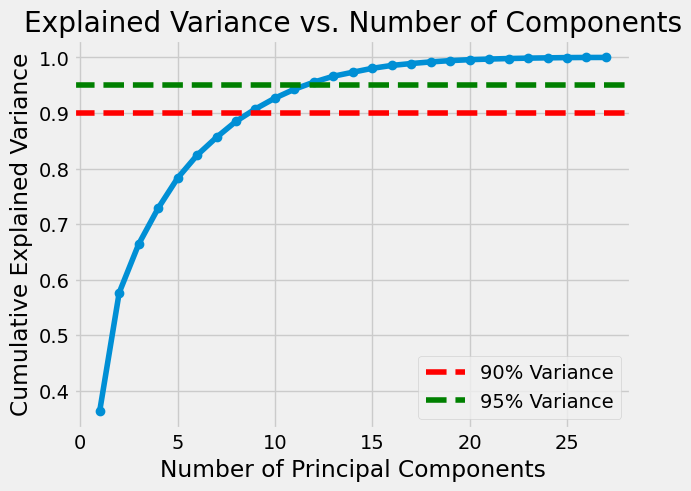

In [222]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance")  # 90% line for reference
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance")  # 95% line for reference
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [223]:
pca = PCA(n_components=7) 

In [224]:
pca_data = pca.fit_transform(df_features_scaled)

In [225]:
from sklearn.cluster import KMeans

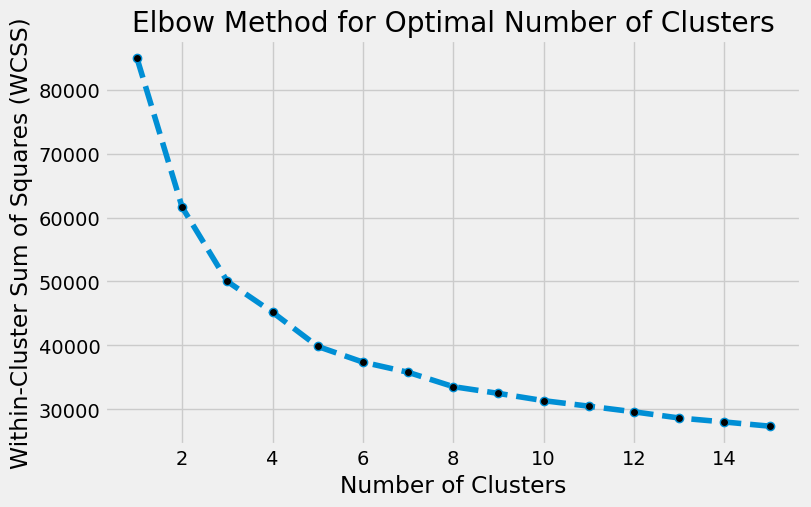

In [226]:
wcss = []
max_clusters = 15  # Define the range of cluster values to test

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares

# Step 3: Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--', mfc = 'black')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [227]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_data)

KMeans(n_clusters=5)

In [228]:
clusters = kmeans.labels_
clusters

array([0, 0, 0, ..., 1, 1, 2])

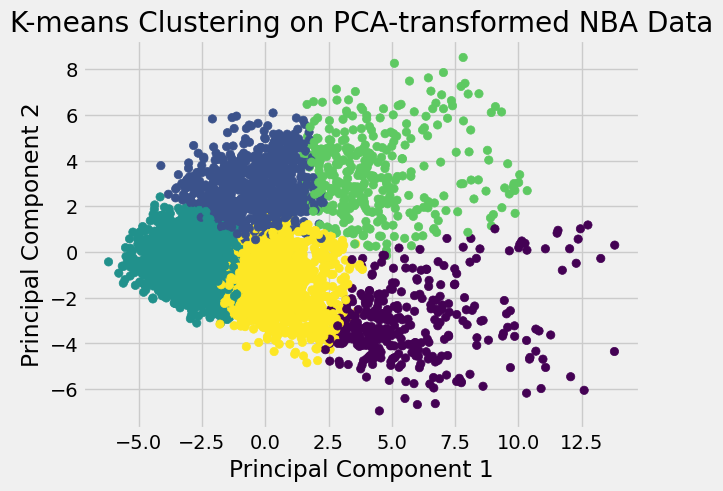

In [229]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-transformed NBA Data')
plt.show()

In [230]:
from scipy.cluster.hierarchy import dendrogram, linkage


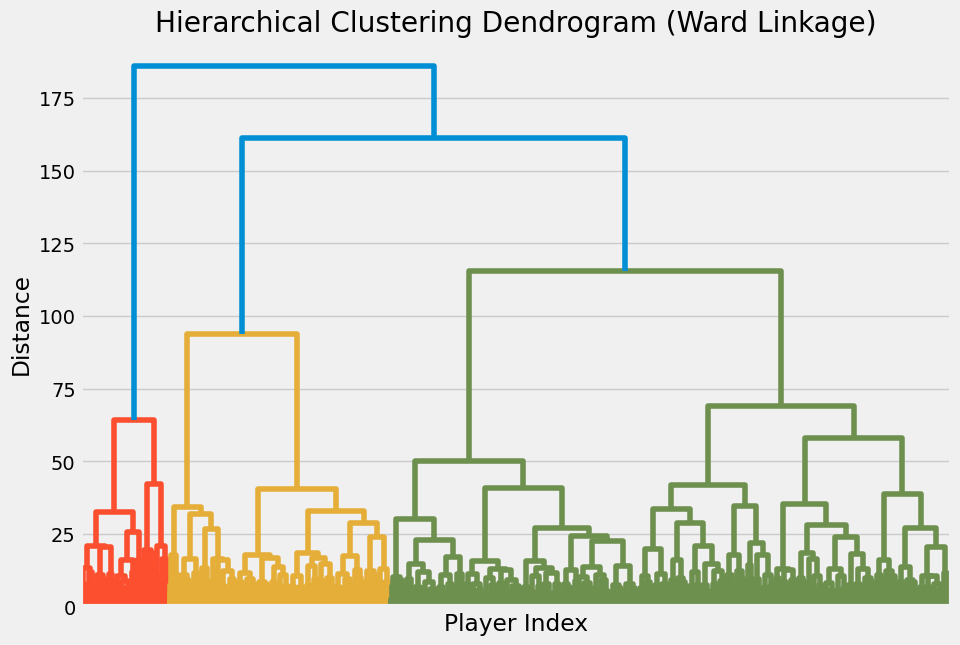

In [231]:
Z = linkage(pca_data, method='ward')

# Step 3: Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_features_scaled.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Player Index')
plt.xticks([])
plt.ylabel('Distance')
plt.show()

In [232]:
from scipy.cluster.hierarchy import fcluster

# Choose a distance threshold to cut the dendrogram
max_distance = 50  # You can adjust this value based on your dendrogram
clusters = fcluster(Z, max_distance, criterion='distance')

len(clusters)  # This will output the cluster assignments for each player

3675

In [233]:
features_reduced['cluster'] = clusters

In [234]:
common_columns = [col for col in data.columns if col not in features_reduced.columns]

In [235]:
common_columns

['Player',
 'Team',
 'Pos',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3PA',
 '3P%',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FT%',
 'TRB',
 'PTS',
 'Tm',
 'TS%',
 '3PAr',
 'FTr',
 'WS',
 'WS/48',
 'BPM',
 'Year']

In [239]:
for col in common_columns:
    features_reduced.insert(len(features_reduced.columns)-1,col, data[col])

In [240]:
features_reduced

,Age,G,GS,3P,2P,FTA,ORB,DRB,AST,STL,...,PTS,Tm,TS%,3PAr,FTr,WS,WS/48,BPM,Year,cluster
0,25.0,81.0,81.0,2.4,8.1,9.9,0.7,6.7,5.5,1.3,...,32.0,OKC,0.635,0.291,0.477,19.2,0.295,10.2,2014,2
1,29.0,77.0,77.0,2.2,7.5,7.0,1.9,6.2,3.1,1.2,...,27.4,NYK,0.561,0.253,0.329,10.7,0.172,5.0,2014,2
2,29.0,77.0,77.0,1.5,8.5,7.6,1.1,5.9,6.3,1.6,...,27.1,MIA,0.649,0.226,0.432,15.9,0.264,8.8,2014,2
3,25.0,77.0,77.0,2.5,6.0,8.2,2.9,9.6,4.4,0.8,...,26.1,MIN,0.591,0.355,0.445,14.3,0.245,8.9,2014,2
4,24.0,73.0,73.0,2.4,5.1,9.1,0.8,3.9,6.1,1.6,...,25.4,HOU,0.618,0.401,0.552,12.8,0.221,5.6,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,22.0,57.0,8.0,0.3,0.6,0.2,0.8,1.2,0.9,0.3,...,2.2,MIL,0.596,0.460,0.110,1.0,0.081,-3.6,2024,5
5659,24.0,44.0,0.0,0.3,0.5,0.0,0.5,1.0,0.6,0.3,...,2.0,LAC,0.490,0.533,0.022,0.5,0.055,-3.8,2024,6
5666,25.0,45.0,11.0,0.0,0.8,0.5,1.2,2.0,0.6,0.2,...,2.0,NYK,0.702,0.000,0.436,1.5,0.127,-1.8,2024,4
5671,31.0,43.0,0.0,0.0,0.6,0.9,1.1,1.5,0.9,0.2,...,1.8,NOP,0.483,0.048,0.613,0.8,0.124,-2.6,2024,4


In [241]:
features_reduced.to_csv('hierarchical_clustering.csv', index = False)